## Excercise 2 (2.9)

In [20]:
from math import factorial

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import binom
from scipy.special import binom as binom_coef

#### Just some imports:
* math includes some mathematical functions. We need the factorial for computing the posterior.
* numpy for the convinient numpy arrays
* matplotlib for plotting
* Just for testing: binomial distribution and binomial coefficients

In [2]:
# The posterior probability is defined in the lecture as:
# P(p|r,N) = (N+1)!/(r!*(N-r)!) p^r * (1-p)^(N-r)
def posterior(p, r, N):
    factor = factorial(N+1) / (factorial(r) * factorial(N-r))
    likelihood = pow(p,r) * pow((1.-p), N-r)
    return (factor * likelihood)

In [3]:
# The posterior is normalized
s = 0.
for k in range(1,1000):
    p = k/1000.
    s+= posterior(p,5,10) / 1000.
print(s)

1.0


In [4]:
# Defining list of the given data
# using numpy arrays here
Energies = np.array([0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4.])
Trials = np.array([100, 100, 100, 100, 100, 1000, 1000, 1000])
Successes = np.array([0,4,20,58,92,987,995,998])

In [5]:
# The mode of the posterior with a flat prior was in the lecture given as p* 0 r/N
Efficiencies_estimate = Successes / Trials
Efficiencies_estimate

array([ 0.   ,  0.04 ,  0.2  ,  0.58 ,  0.92 ,  0.987,  0.995,  0.998])

In [6]:
# producing list of the posterior probability values for plotting
stepsize = 1./10000.
posterior_values = []
for i in range(0,len(Energies)):
    posterior_values.append([])
    for x in np.arange(0,1, stepsize):
        posterior_values[i].append(posterior(x,Successes[i],Trials[i]))

# producing list of x values
x_values = list(np.arange(0,1, stepsize))

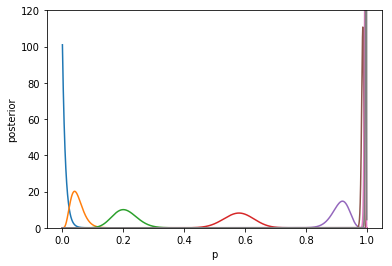

In [7]:
plt.ylim(0,120)
plt.xlabel('p')
plt.ylabel('posterior')
for i in range(0,len(Energies)):
    plt.plot(x_values, posterior_values[i])

plt.show()

#### Defining smallest interval
Here I am sorting the list of posterior values. This gives us the rank of the posterior value for a given p. Then I am adding values according to their rank as long as the sum of them is less than 1-alpha. The last added values for
p are the xmax and xmin, depending on which side of the mode they are.

In [8]:
def smallest_interval(k, alpha, stepsize):
    l = list(sorted(zip(posterior_values[k], x_values), reverse=True))
    count = 0.
    i = 0
    x_min = x_max = 0
    p = Successes[k] / Trials[k] # mode
    while count < (1-alpha):
        count+= l[i][0]*stepsize
        if(l[i][1] >= p):
            x_max = l[i][1]
        else:
            x_min = l[i][1]
        i=i+1
    return x_min, x_max, count

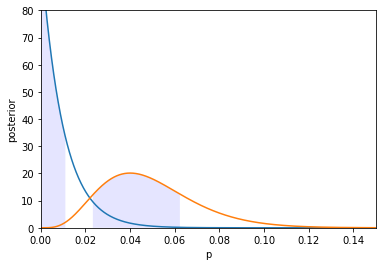

In [9]:
plt.ylim(0,80) # setting appropiate limits
plt.xlim(0,0.15)
plt.xlabel('p')
plt.ylabel('posterior')
for k in range(0,2):
    #calculating the smallest interval
    xmin, xmax, p_contained = smallest_interval(k,0.32,stepsize)
    plt.plot(x_values, posterior_values[k])
    # producing the shaded region of the smallest interval
    SI = np.arange(xmin,xmax,0.001)
    plt.fill_between(SI, posterior(SI,Successes[k], Trials[k]), facecolor='blue', alpha=0.1)
plt.show()

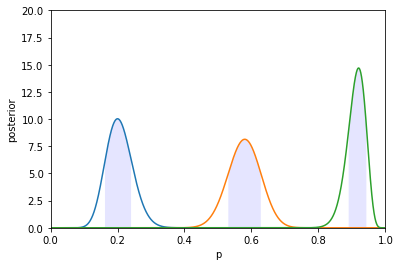

In [10]:
plt.ylim(0,20) # setting appropiate limits
plt.xlim(0,1)
plt.xlabel('p')
plt.ylabel('posterior')
for k in range(2,5):
    xmin, xmax, p_contained = smallest_interval(k,0.32,stepsize)
    plt.plot(x_values, posterior_values[k])
    SI = np.arange(xmin,xmax,0.001)
    plt.fill_between(SI, posterior(SI,Successes[k], Trials[k]), facecolor='blue', alpha=0.1)
plt.show()

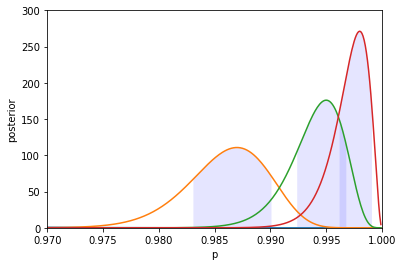

In [11]:
plt.ylim(0,300) # setting appropiate limits
plt.xlim(0.97,1)
plt.xlabel('p')
plt.ylabel('posterior')
for k in range(4,8):
    xmin, xmax, p_contained = smallest_interval(k,0.32,stepsize)
    plt.plot(x_values, posterior_values[k])
    SI = np.arange(xmin,xmax,0.0001)
    plt.fill_between(SI, posterior(SI,Successes[k], Trials[k]), facecolor='blue', alpha=0.1)
plt.show()

In [12]:
for k in range(0,8):
    print(smallest_interval(k, 0.32, stepsize))

(0, 0.0111, 0.68282517812524623)
(0.023300000000000001, 0.062800000000000009, 0.68068242984100746)
(0.16250000000000001, 0.2414, 0.680184571468476)
(0.53090000000000004, 0.62809999999999999, 0.68044895836295538)
(0.89030000000000009, 0.94420000000000004, 0.68003273993830804)
(0.98310000000000008, 0.99020000000000008, 0.68162363209870092)
(0.99240000000000006, 0.99690000000000001, 0.68740542372851232)
(0.99620000000000009, 0.9991000000000001, 0.68543765857560712)


## Exercise 3 (2.10)

In [23]:
# calculating the boundaries of the central interval
def central_interval(p, N, alpha):
    r_min = 0
    s = binom.pmf(0, N, p)
    while s <= alpha/2:
        r_min += 1
        #s += binom.pmf(r_min, N, p)
        s += dyn_binom(r_min, N, p)

        
    r_max = N
    s = binom.pmf(N, N, p)
    while s <= alpha/2:
        r_max -= 1
        #s += binom.pmf(r_max, N, p)
        s += dyn_binom(r_max, N, p)
  
    return r_min, r_max

In [24]:
def smallest_interval(p, N, alpha):
    Rs = []
    P_binoms = []
    for r in range(0,N+1):
        Rs.append(r)
        #P_binoms.append(binom.pmf(r, N, p))
        P_binoms.append(dyn_binom(r, N, p))
    l = list(sorted(zip(P_binoms, Rs), reverse=True))
    s = 0
    i = 0
    r_min = 0
    r_max = N
    est = p*N
    
    if p == 0:
        r_min=r_max=0
        s=1
    elif p == 1:
        r_min=r_max=N
        s=1
    else:
        while(s < 1-alpha):
            s += l[i][0]
            if(l[i][1] >= est):
                r_max = l[i][1]
            else:
                r_min = l[i][1]
            i=i+1
    return r_min, r_max

In [25]:
lookup = np.zeros([1001,1001])
for N in range(0,1001):
    for r in range(0,N+1):
        lookup[N][r] = binom_coef(N,r)
  

In [26]:
def dyn_binom(r, N, p):
    return lookup[N][r]*pow(p,r)*pow(1-p,N-r)

In [27]:
# Defining list of the given data
# using numpy arrays here
Energies = np.array([0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4.])
Trials = np.array([100, 100, 100, 100, 100, 1000, 1000, 1000])
Successes = np.array([0,4,20,58,92,987,995,998])

# The mode of the posterior with a flat prior was in the lecture given as p* 0 r/N
Efficiencies_estimate = Successes / Trials
Efficiencies_estimate

array([ 0.   ,  0.04 ,  0.2  ,  0.58 ,  0.92 ,  0.987,  0.995,  0.998])

In [30]:
# Produce Neyman Confidence Levels
def neyman_CL(N, interval='CI', alpha=0.1):
    stepsize = 1./1000
    p_values = np.arange(0,1,stepsize)
    r_min = []
    r_max = []

    for p in p_values:
        if interval == 'CI':
            r1, r2 = central_interval(p, N, alpha)
        elif interval == 'SI':
            r1, r2 = smallest_interval(p, N, alpha)
        r_min.append(r1)
        r_max.append(r2)
    return np.array(r_min), np.array(r_max), p_values
    
    

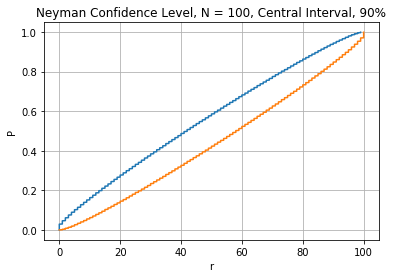

In [31]:
r_min_100, r_max_100, p_values = neyman_CL(100, 'CI', 1.-0.90)
plt.plot(r_min_100, p_values)
plt.plot(r_max_100, p_values)
plt.xlabel('r')
plt.ylabel('P')
plt.title('Neyman Confidence Level, N = 100, Central Interval, 90%')
plt.grid(True)
plt.show()

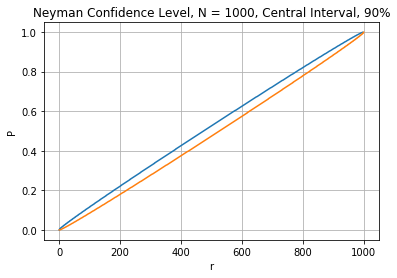

In [32]:
r_min_1k, r_max_1k, p_values = neyman_CL(1000, 'CI', 1.-0.90)
plt.plot(r_min_1k, p_values)
plt.plot(r_max_1k, p_values)
plt.xlabel('r')
plt.ylabel('P')
plt.title('Neyman Confidence Level, N = 1000, Central Interval, 90%')
plt.grid(True)
plt.show()

In [33]:
print("Central Interval")
print("E(GeV)\t N\t r\t p_est\t p_min\t p_max" )

p_min = []
p_max = []

for i in range(0,len(Energies)):
    E = Energies[i]
    R = Successes[i]
    N = Trials[i]
    p_est = Efficiencies_estimate[i]
    if(N == 1000):
        r_min = r_min_1k
        r_max = r_max_1k
    else:
        r_min = r_min_100
        r_max = r_max_100
        
    p_min.append(r_max.searchsorted(R, side='left')/1000)
    p_max.append(r_min.searchsorted(R, side='right')/1000)
    print(E, "\t", N, "\t", R, "\t", p_est, "\t", p_min[i], "\t" ,p_max[i])

Central Interval
E(GeV)	 N	 r	 p_est	 p_min	 p_max
0.5 	 100 	 0 	 0.0 	 0.0 	 0.03
1.0 	 100 	 4 	 0.04 	 0.014 	 0.09
1.5 	 100 	 20 	 0.2 	 0.137 	 0.278
2.0 	 100 	 58 	 0.58 	 0.493 	 0.664
2.5 	 100 	 92 	 0.92 	 0.861 	 0.96
3.0 	 1000 	 987 	 0.987 	 0.98 	 0.993
3.5 	 1000 	 995 	 0.995 	 0.99 	 0.999
4.0 	 1000 	 998 	 0.998 	 0.994 	 1.0


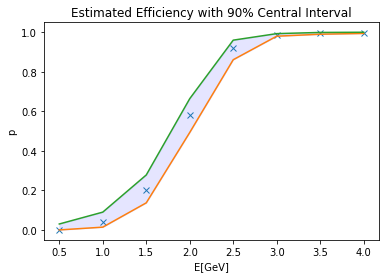

In [34]:
plt.plot(Energies, Efficiencies_estimate, marker='x', linestyle='')
plt.plot(Energies, p_min)
plt.plot(Energies, p_max)
plt.fill_between(x=Energies, y1=p_min, y2=p_max, color='blue', alpha=0.1)
plt.xlabel('E[GeV]')
plt.ylabel('p')
plt.title('Estimated Efficiency with 90% Central Interval')
plt.show()

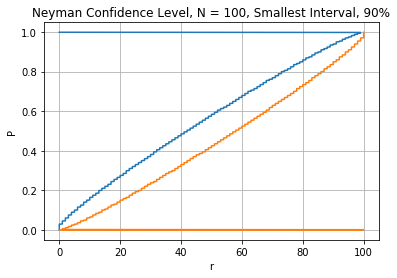

In [35]:
r_min_100_SI, r_max_100_SI, p_values = neyman_CL(100, 'SI', 1.-0.90)
plt.plot(r_min_100_SI, p_values)
plt.plot(r_max_100_SI, p_values)
plt.xlabel('r')
plt.ylabel('P')
plt.title('Neyman Confidence Level, N = 100, Smallest Interval, 90%')
plt.grid(True)
plt.show()

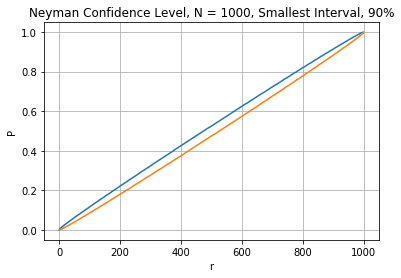

In [36]:
r_min_1k_SI, r_max_1k_SI, p_values = neyman_CL(1000, 'SI', 1.-0.90)
plt.plot(r_min_1k_SI, p_values)
plt.plot(r_max_1k_SI, p_values)
plt.xlabel('r')
plt.ylabel('P')
plt.title('Neyman Confidence Level, N = 1000, Smallest Interval, 90%')
plt.grid(True)
plt.show()

In [37]:
print("Smallest Interval")
print("E(GeV)\t N\t r\t p_est\t p_min\t p_max" )

p_min_SI = []
p_max_SI = []

for i in range(0,len(Energies)):
    E = Energies[i]
    R = Successes[i]
    N = Trials[i]
    p_est = Efficiencies_estimate[i]
    if(N == 1000):
        r_min = r_min_1k_SI
        r_max = r_max_1k_SI
    else:
        r_min = r_min_100_SI
        r_max = r_max_100_SI
        
    p_min_SI.append(r_max.searchsorted(R, side='left')/1000)
    p_max_SI.append(r_min.searchsorted(R, side='right')/1000)
    print(E, "\t", N, "\t", R, "\t", p_est, "\t", p_min_SI[i], "\t" ,p_max_SI[i])

Smallest Interval
E(GeV)	 N	 r	 p_est	 p_min	 p_max
0.5 	 100 	 0 	 0.0 	 0.0 	 0.03
1.0 	 100 	 4 	 0.04 	 0.018 	 0.09
1.5 	 100 	 20 	 0.2 	 0.141 	 0.276
2.0 	 100 	 58 	 0.58 	 0.496 	 0.66
2.5 	 100 	 92 	 0.92 	 0.86 	 0.955
3.0 	 1000 	 987 	 0.987 	 0.98 	 0.993
3.5 	 1000 	 995 	 0.995 	 0.99 	 0.998
4.0 	 1000 	 998 	 0.998 	 0.994 	 1.0


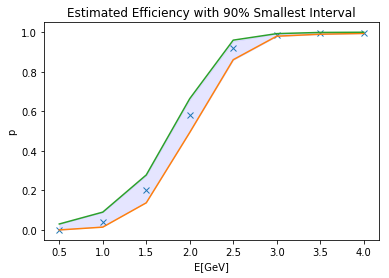

In [38]:
plt.plot(Energies, Efficiencies_estimate, marker='x', linestyle='')
plt.plot(Energies, p_min)
plt.plot(Energies, p_max)
plt.fill_between(x=Energies, y1=p_min_SI, y2=p_max_SI, color='blue', alpha=0.1)
plt.xlabel('E[GeV]')
plt.ylabel('p')
plt.title('Estimated Efficiency with 90% Smallest Interval')
plt.show()

In [39]:
r_max_100 - r_max_100_SI

array([  0, -99,   0,   0,   1,   1,   0,   0,   0,   1,   1,   1,   0,
         0,   1,   1,   1,   1,   0,   0,   1,   1,   1,   1,   1,   0,
         0,   1,   1,   1,   0,   0,   0,   0,   1,   1,   1,   0,   0,
         0,   0,   1,   1,   1,   1,   1,   0,   0,   1,   1,   0,   0,
         0,   0,   0,   0,   1,   1,   1,   1,   1,   0,   0,   1,   1,
         1,   0,   0,   0,   0,   0,   1,   1,   1,   1,   1,   0,   0,
         0,   1,   1,   1,   1,   1,   0,   0,   0,   1,   1,   1,   0,
         0,   0,   0,   0,   1,   1,   1,   1,   1,   1,   0,   0,   0,
         1,   1,   0,   0,   0,   0,   0,   0,   1,   1,   1,   1,   0,
         0,   0,   0,   1,   1,   1,   1,   1,   1,   0,   0,   0,   1,
         1,   0,   0,   0,   0,   0,   0,   1,   1,   1,   1,   0,   0,
         0,   0,   0,   1,   1,   1,   1,   1,   0,   0,   0,   1,   1,
         1,   1,   1,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,
         0,   0,   0,   1,   1,   1,   1,   0,   0,   0,   0,   